In [217]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt

seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

In [218]:
boston=load_boston()

In [219]:
X_data=boston['data']

In [220]:
df=pd.DataFrame(X_data,columns=boston['feature_names'])

In [221]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [222]:
#표준화
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(df)

scaled_df=scaler.transform(df)


In [223]:
scaled_x=scaled_df

In [224]:
Y_data=boston['target']

In [225]:
Y_data

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [226]:
Y_data.reshape(-1,1).shape

(506, 1)

In [227]:
model=Sequential()
model.add(Dense(64,input_dim=13,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer='adam',metrics=["mae"])

In [228]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_34 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [229]:
import os

MODEL_DIR='./model/'
if not os.path.exists(MODEL_DIR):
    os.makedir(MODEL_DIR)
    
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"

In [230]:
early_stop=EarlyStopping(monitor="val_loss",patience=100)

In [231]:
checkpointer=ModelCheckpoint(filepath=modelpath,monitor='val_loss',verbose=1,save_best_only=True)

In [232]:
history=model.fit(scaled_x,Y_data,validation_split=0.3,epochs=1500,batch_size=300,callbacks=[early_stop,checkpointer])

Epoch 1/1500
1/2 [==============>...............] - ETA: 0s - loss: 730.0081 - mae: 25.5739
Epoch 00001: val_loss improved from inf to 334.02029, saving model to ./model\01-334.0203.hdf5
2/2 [==============================] - 0s 52ms/step - loss: 709.4766 - mae: 25.2672 - val_loss: 334.0203 - val_mae: 16.3283
Epoch 2/1500
1/2 [==============>...............] - ETA: 0s - loss: 710.4022 - mae: 25.2563
Epoch 00002: val_loss improved from 334.02029 to 326.83459, saving model to ./model\02-326.8346.hdf5
2/2 [==============================] - 0s 17ms/step - loss: 699.0545 - mae: 25.0693 - val_loss: 326.8346 - val_mae: 16.0977
Epoch 3/1500
1/2 [==============>...............] - ETA: 0s - loss: 686.1906 - mae: 24.8537
Epoch 00003: val_loss improved from 326.83459 to 319.90601, saving model to ./model\03-319.9060.hdf5
2/2 [==============================] - 0s 14ms/step - loss: 688.6072 - mae: 24.8704 - val_loss: 319.9060 - val_mae: 15.8723
Epoch 4/1500
1/2 [==============>...............] - ETA

Epoch 27/1500
1/2 [==============>...............] - ETA: 0s - loss: 274.0432 - mae: 15.0519
Epoch 00027: val_loss improved from 176.27661 to 170.44438, saving model to ./model\27-170.4444.hdf5
2/2 [==============================] - 0s 15ms/step - loss: 273.0518 - mae: 15.0623 - val_loss: 170.4444 - val_mae: 10.1968
Epoch 28/1500
1/2 [==============>...............] - ETA: 0s - loss: 254.7620 - mae: 14.3940
Epoch 00028: val_loss improved from 170.44438 to 164.76511, saving model to ./model\28-164.7651.hdf5
2/2 [==============================] - 0s 16ms/step - loss: 248.1454 - mae: 14.2391 - val_loss: 164.7651 - val_mae: 9.9715
Epoch 29/1500
1/2 [==============>...............] - ETA: 0s - loss: 231.8504 - mae: 13.6333
Epoch 00029: val_loss improved from 164.76511 to 159.28221, saving model to ./model\29-159.2822.hdf5
2/2 [==============================] - 0s 15ms/step - loss: 223.8638 - mae: 13.3843 - val_loss: 159.2822 - val_mae: 9.7706
Epoch 30/1500
1/2 [==============>..............

1/2 [==============>...............] - ETA: 0s - loss: 25.0319 - mae: 3.9449
Epoch 00053: val_loss improved from 89.71990 to 88.91801, saving model to ./model\53-88.9180.hdf5
2/2 [==============================] - 0s 22ms/step - loss: 26.0101 - mae: 4.0010 - val_loss: 88.9180 - val_mae: 6.7193
Epoch 54/1500
1/2 [==============>...............] - ETA: 0s - loss: 25.5069 - mae: 3.9624
Epoch 00054: val_loss improved from 88.91801 to 88.27659, saving model to ./model\54-88.2766.hdf5
2/2 [==============================] - 0s 22ms/step - loss: 24.5317 - mae: 3.8819 - val_loss: 88.2766 - val_mae: 6.6915
Epoch 55/1500
1/2 [==============>...............] - ETA: 0s - loss: 24.0292 - mae: 3.8751
Epoch 00055: val_loss improved from 88.27659 to 87.76886, saving model to ./model\55-87.7689.hdf5
2/2 [==============================] - 0s 18ms/step - loss: 23.2088 - mae: 3.7754 - val_loss: 87.7689 - val_mae: 6.6710
Epoch 56/1500
1/2 [==============>...............] - ETA: 0s - loss: 21.7581 - mae: 3.6

Epoch 83/1500
1/2 [==============>...............] - ETA: 0s - loss: 13.2037 - mae: 2.8971
Epoch 00083: val_loss did not improve from 86.65686
2/2 [==============================] - 0s 6ms/step - loss: 12.9893 - mae: 2.8700 - val_loss: 90.9307 - val_mae: 6.9600
Epoch 84/1500
1/2 [==============>...............] - ETA: 0s - loss: 13.3566 - mae: 2.8922
Epoch 00084: val_loss did not improve from 86.65686
2/2 [==============================] - 0s 6ms/step - loss: 12.8761 - mae: 2.8555 - val_loss: 90.9055 - val_mae: 6.9617
Epoch 85/1500
1/2 [==============>...............] - ETA: 0s - loss: 12.3145 - mae: 2.7943
Epoch 00085: val_loss did not improve from 86.65686
2/2 [==============================] - 0s 6ms/step - loss: 12.7785 - mae: 2.8430 - val_loss: 90.8149 - val_mae: 6.9604
Epoch 86/1500
1/2 [==============>...............] - ETA: 0s - loss: 13.5690 - mae: 2.9266
Epoch 00086: val_loss did not improve from 86.65686
2/2 [==============================] - 0s 6ms/step - loss: 12.6793 - ma

1/2 [==============>...............] - ETA: 0s - loss: 9.9853 - mae: 2.5234
Epoch 00114: val_loss did not improve from 86.65686
2/2 [==============================] - 0s 7ms/step - loss: 10.5812 - mae: 2.5716 - val_loss: 87.8510 - val_mae: 6.8988
Epoch 115/1500
1/2 [==============>...............] - ETA: 0s - loss: 11.1330 - mae: 2.6425
Epoch 00115: val_loss did not improve from 86.65686
2/2 [==============================] - 0s 6ms/step - loss: 10.5200 - mae: 2.5629 - val_loss: 87.7348 - val_mae: 6.8963
Epoch 116/1500
1/2 [==============>...............] - ETA: 0s - loss: 10.4037 - mae: 2.5416
Epoch 00116: val_loss did not improve from 86.65686
2/2 [==============================] - 0s 7ms/step - loss: 10.4621 - mae: 2.5548 - val_loss: 87.6009 - val_mae: 6.8921
Epoch 117/1500
1/2 [==============>...............] - ETA: 0s - loss: 10.7866 - mae: 2.6120
Epoch 00117: val_loss did not improve from 86.65686
2/2 [==============================] - 0s 6ms/step - loss: 10.3989 - mae: 2.5452 - 

2/2 [==============================] - 0s 15ms/step - loss: 9.2289 - mae: 2.3940 - val_loss: 81.5812 - val_mae: 6.5989
Epoch 142/1500
1/2 [==============>...............] - ETA: 0s - loss: 9.1801 - mae: 2.3718
Epoch 00142: val_loss improved from 81.58120 to 81.44009, saving model to ./model\142-81.4401.hdf5
2/2 [==============================] - 0s 16ms/step - loss: 9.1826 - mae: 2.3879 - val_loss: 81.4401 - val_mae: 6.5919
Epoch 143/1500
1/2 [==============>...............] - ETA: 0s - loss: 9.6716 - mae: 2.4566
Epoch 00143: val_loss improved from 81.44009 to 81.36365, saving model to ./model\143-81.3636.hdf5
2/2 [==============================] - 0s 16ms/step - loss: 9.1397 - mae: 2.3820 - val_loss: 81.3636 - val_mae: 6.5885
Epoch 144/1500
1/2 [==============>...............] - ETA: 0s - loss: 8.8708 - mae: 2.3780
Epoch 00144: val_loss improved from 81.36365 to 81.25956, saving model to ./model\144-81.2596.hdf5
2/2 [==============================] - 0s 16ms/step - loss: 9.0967 - mae:

1/2 [==============>...............] - ETA: 0s - loss: 7.6256 - mae: 2.1585
Epoch 00168: val_loss improved from 74.84523 to 74.48322, saving model to ./model\168-74.4832.hdf5
2/2 [==============================] - 0s 16ms/step - loss: 8.2204 - mae: 2.2535 - val_loss: 74.4832 - val_mae: 6.2257
Epoch 169/1500
1/2 [==============>...............] - ETA: 0s - loss: 8.1659 - mae: 2.2497
Epoch 00169: val_loss improved from 74.48322 to 74.15682, saving model to ./model\169-74.1568.hdf5
2/2 [==============================] - 0s 16ms/step - loss: 8.1928 - mae: 2.2466 - val_loss: 74.1568 - val_mae: 6.2083
Epoch 170/1500
1/2 [==============>...............] - ETA: 0s - loss: 7.9198 - mae: 2.2212
Epoch 00170: val_loss improved from 74.15682 to 73.90481, saving model to ./model\170-73.9048.hdf5
2/2 [==============================] - 0s 16ms/step - loss: 8.1602 - mae: 2.2401 - val_loss: 73.9048 - val_mae: 6.1952
Epoch 171/1500
1/2 [==============>...............] - ETA: 0s - loss: 7.9649 - mae: 2.21

2/2 [==============================] - 0s 15ms/step - loss: 7.4839 - mae: 2.1346 - val_loss: 68.2095 - val_mae: 5.8920
Epoch 195/1500
1/2 [==============>...............] - ETA: 0s - loss: 7.4125 - mae: 2.1254
Epoch 00195: val_loss improved from 68.20953 to 67.95108, saving model to ./model\195-67.9511.hdf5
2/2 [==============================] - 0s 14ms/step - loss: 7.4654 - mae: 2.1309 - val_loss: 67.9511 - val_mae: 5.8778
Epoch 196/1500
1/2 [==============>...............] - ETA: 0s - loss: 7.5926 - mae: 2.1354
Epoch 00196: val_loss improved from 67.95108 to 67.75340, saving model to ./model\196-67.7534.hdf5
2/2 [==============================] - 0s 16ms/step - loss: 7.4378 - mae: 2.1256 - val_loss: 67.7534 - val_mae: 5.8663
Epoch 197/1500
1/2 [==============>...............] - ETA: 0s - loss: 7.0826 - mae: 2.0732
Epoch 00197: val_loss improved from 67.75340 to 67.58395, saving model to ./model\197-67.5840.hdf5
2/2 [==============================] - 0s 15ms/step - loss: 7.4127 - mae:

1/2 [==============>...............] - ETA: 0s - loss: 6.8886 - mae: 2.0316
Epoch 00221: val_loss improved from 62.42451 to 62.10109, saving model to ./model\221-62.1011.hdf5
2/2 [==============================] - 0s 15ms/step - loss: 6.9041 - mae: 2.0358 - val_loss: 62.1011 - val_mae: 5.5641
Epoch 222/1500
1/2 [==============>...............] - ETA: 0s - loss: 7.1082 - mae: 2.0685
Epoch 00222: val_loss improved from 62.10109 to 61.74443, saving model to ./model\222-61.7444.hdf5
2/2 [==============================] - 0s 15ms/step - loss: 6.8861 - mae: 2.0318 - val_loss: 61.7444 - val_mae: 5.5434
Epoch 223/1500
1/2 [==============>...............] - ETA: 0s - loss: 6.7144 - mae: 2.0098
Epoch 00223: val_loss improved from 61.74443 to 61.41993, saving model to ./model\223-61.4199.hdf5
2/2 [==============================] - 0s 16ms/step - loss: 6.8687 - mae: 2.0267 - val_loss: 61.4199 - val_mae: 5.5240
Epoch 224/1500
1/2 [==============>...............] - ETA: 0s - loss: 7.0765 - mae: 2.05

Epoch 248/1500
1/2 [==============>...............] - ETA: 0s - loss: 6.9461 - mae: 2.0385
Epoch 00248: val_loss improved from 57.67026 to 57.48603, saving model to ./model\248-57.4860.hdf5
2/2 [==============================] - 0s 16ms/step - loss: 6.4743 - mae: 1.9609 - val_loss: 57.4860 - val_mae: 5.2834
Epoch 249/1500
1/2 [==============>...............] - ETA: 0s - loss: 6.1971 - mae: 1.8945
Epoch 00249: val_loss improved from 57.48603 to 57.31114, saving model to ./model\249-57.3111.hdf5
2/2 [==============================] - 0s 15ms/step - loss: 6.4526 - mae: 1.9596 - val_loss: 57.3111 - val_mae: 5.2734
Epoch 250/1500
1/2 [==============>...............] - ETA: 0s - loss: 6.1482 - mae: 1.9175
Epoch 00250: val_loss improved from 57.31114 to 57.08715, saving model to ./model\250-57.0871.hdf5
2/2 [==============================] - 0s 15ms/step - loss: 6.4298 - mae: 1.9571 - val_loss: 57.0871 - val_mae: 5.2605
Epoch 251/1500
1/2 [==============>...............] - ETA: 0s - loss: 6.2

2/2 [==============================] - 0s 15ms/step - loss: 6.0966 - mae: 1.9088 - val_loss: 52.7127 - val_mae: 4.9821
Epoch 275/1500
1/2 [==============>...............] - ETA: 0s - loss: 5.8821 - mae: 1.8763
Epoch 00275: val_loss improved from 52.71272 to 52.67913, saving model to ./model\275-52.6791.hdf5
2/2 [==============================] - 0s 16ms/step - loss: 6.0874 - mae: 1.9064 - val_loss: 52.6791 - val_mae: 4.9793
Epoch 276/1500
1/2 [==============>...............] - ETA: 0s - loss: 6.2008 - mae: 1.9158
Epoch 00276: val_loss improved from 52.67913 to 52.62947, saving model to ./model\276-52.6295.hdf5
2/2 [==============================] - 0s 15ms/step - loss: 6.0780 - mae: 1.9052 - val_loss: 52.6295 - val_mae: 4.9760
Epoch 277/1500
1/2 [==============>...............] - ETA: 0s - loss: 6.2090 - mae: 1.9147
Epoch 00277: val_loss improved from 52.62947 to 52.56815, saving model to ./model\277-52.5681.hdf5
2/2 [==============================] - 0s 16ms/step - loss: 6.0595 - mae:

1/2 [==============>...............] - ETA: 0s - loss: 5.7427 - mae: 1.8410
Epoch 00301: val_loss improved from 49.56591 to 49.45550, saving model to ./model\301-49.4555.hdf5
2/2 [==============================] - 0s 16ms/step - loss: 5.7587 - mae: 1.8559 - val_loss: 49.4555 - val_mae: 4.7780
Epoch 302/1500
1/2 [==============>...............] - ETA: 0s - loss: 5.6893 - mae: 1.8497
Epoch 00302: val_loss improved from 49.45550 to 49.35229, saving model to ./model\302-49.3523.hdf5
2/2 [==============================] - 0s 15ms/step - loss: 5.7486 - mae: 1.8531 - val_loss: 49.3523 - val_mae: 4.7705
Epoch 303/1500
1/2 [==============>...............] - ETA: 0s - loss: 5.7368 - mae: 1.8757
Epoch 00303: val_loss improved from 49.35229 to 49.24483, saving model to ./model\303-49.2448.hdf5
2/2 [==============================] - 0s 15ms/step - loss: 5.7422 - mae: 1.8509 - val_loss: 49.2448 - val_mae: 4.7634
Epoch 304/1500
1/2 [==============>...............] - ETA: 0s - loss: 5.8767 - mae: 1.84

2/2 [==============================] - 0s 14ms/step - loss: 5.4976 - mae: 1.8054 - val_loss: 46.3948 - val_mae: 4.5805
Epoch 328/1500
1/2 [==============>...............] - ETA: 0s - loss: 5.1604 - mae: 1.7760
Epoch 00328: val_loss improved from 46.39484 to 46.26137, saving model to ./model\328-46.2614.hdf5
2/2 [==============================] - 0s 14ms/step - loss: 5.4817 - mae: 1.8032 - val_loss: 46.2614 - val_mae: 4.5731
Epoch 329/1500
1/2 [==============>...............] - ETA: 0s - loss: 5.3678 - mae: 1.7846
Epoch 00329: val_loss improved from 46.26137 to 46.13773, saving model to ./model\329-46.1377.hdf5
2/2 [==============================] - 0s 15ms/step - loss: 5.4716 - mae: 1.8019 - val_loss: 46.1377 - val_mae: 4.5665
Epoch 330/1500
1/2 [==============>...............] - ETA: 0s - loss: 5.5594 - mae: 1.8209
Epoch 00330: val_loss improved from 46.13773 to 46.03458, saving model to ./model\330-46.0346.hdf5
2/2 [==============================] - 0s 15ms/step - loss: 5.4640 - mae:

1/2 [==============>...............] - ETA: 0s - loss: 5.3168 - mae: 1.7792
Epoch 00354: val_loss improved from 44.34757 to 44.30196, saving model to ./model\354-44.3020.hdf5
2/2 [==============================] - 0s 15ms/step - loss: 5.2510 - mae: 1.7652 - val_loss: 44.3020 - val_mae: 4.4598
Epoch 355/1500
1/2 [==============>...............] - ETA: 0s - loss: 5.1052 - mae: 1.7257
Epoch 00355: val_loss improved from 44.30196 to 44.24046, saving model to ./model\355-44.2405.hdf5
2/2 [==============================] - 0s 15ms/step - loss: 5.2384 - mae: 1.7605 - val_loss: 44.2405 - val_mae: 4.4572
Epoch 356/1500
1/2 [==============>...............] - ETA: 0s - loss: 5.2342 - mae: 1.7635
Epoch 00356: val_loss improved from 44.24046 to 44.17588, saving model to ./model\356-44.1759.hdf5
2/2 [==============================] - 0s 14ms/step - loss: 5.2359 - mae: 1.7566 - val_loss: 44.1759 - val_mae: 4.4553
Epoch 357/1500
1/2 [==============>...............] - ETA: 0s - loss: 5.1794 - mae: 1.76

Epoch 381/1500
1/2 [==============>...............] - ETA: 0s - loss: 4.8442 - mae: 1.6947
Epoch 00381: val_loss improved from 42.93872 to 42.91160, saving model to ./model\381-42.9116.hdf5
2/2 [==============================] - 0s 15ms/step - loss: 5.0713 - mae: 1.7273 - val_loss: 42.9116 - val_mae: 4.4087
Epoch 382/1500
1/2 [==============>...............] - ETA: 0s - loss: 5.1881 - mae: 1.7517
Epoch 00382: val_loss improved from 42.91160 to 42.88448, saving model to ./model\382-42.8845.hdf5
2/2 [==============================] - 0s 15ms/step - loss: 5.0613 - mae: 1.7245 - val_loss: 42.8845 - val_mae: 4.4044
Epoch 383/1500
1/2 [==============>...............] - ETA: 0s - loss: 5.1762 - mae: 1.7370
Epoch 00383: val_loss improved from 42.88448 to 42.83411, saving model to ./model\383-42.8341.hdf5
2/2 [==============================] - 0s 15ms/step - loss: 5.0483 - mae: 1.7246 - val_loss: 42.8341 - val_mae: 4.3999
Epoch 384/1500
1/2 [==============>...............] - ETA: 0s - loss: 5.1

1/2 [==============>...............] - ETA: 0s - loss: 4.9755 - mae: 1.7044
Epoch 00408: val_loss improved from 41.90224 to 41.83436, saving model to ./model\408-41.8344.hdf5
2/2 [==============================] - 0s 14ms/step - loss: 4.8973 - mae: 1.7055 - val_loss: 41.8344 - val_mae: 4.3478
Epoch 409/1500
1/2 [==============>...............] - ETA: 0s - loss: 5.1951 - mae: 1.7530
Epoch 00409: val_loss improved from 41.83436 to 41.77797, saving model to ./model\409-41.7780.hdf5
2/2 [==============================] - 0s 15ms/step - loss: 4.9054 - mae: 1.6988 - val_loss: 41.7780 - val_mae: 4.3522
Epoch 410/1500
1/2 [==============>...............] - ETA: 0s - loss: 5.2734 - mae: 1.7555
Epoch 00410: val_loss improved from 41.77797 to 41.73767, saving model to ./model\410-41.7377.hdf5
2/2 [==============================] - 0s 15ms/step - loss: 4.9185 - mae: 1.6978 - val_loss: 41.7377 - val_mae: 4.3564
Epoch 411/1500
1/2 [==============>...............] - ETA: 0s - loss: 4.5752 - mae: 1.64

Epoch 436/1500
1/2 [==============>...............] - ETA: 0s - loss: 4.7029 - mae: 1.6880
Epoch 00436: val_loss improved from 41.01184 to 41.00716, saving model to ./model\436-41.0072.hdf5
2/2 [==============================] - 0s 16ms/step - loss: 4.7459 - mae: 1.6696 - val_loss: 41.0072 - val_mae: 4.3234
Epoch 437/1500
1/2 [==============>...............] - ETA: 0s - loss: 4.6761 - mae: 1.6635
Epoch 00437: val_loss did not improve from 41.00716
2/2 [==============================] - 0s 7ms/step - loss: 4.7413 - mae: 1.6698 - val_loss: 41.0094 - val_mae: 4.3298
Epoch 438/1500
1/2 [==============>...............] - ETA: 0s - loss: 4.7175 - mae: 1.6611
Epoch 00438: val_loss did not improve from 41.00716
2/2 [==============================] - 0s 7ms/step - loss: 4.7353 - mae: 1.6693 - val_loss: 41.0175 - val_mae: 4.3376
Epoch 439/1500
1/2 [==============>...............] - ETA: 0s - loss: 4.6378 - mae: 1.6319
Epoch 00439: val_loss did not improve from 41.00716
2/2 [=====================

Epoch 467/1500
1/2 [==============>...............] - ETA: 0s - loss: 4.5315 - mae: 1.6179
Epoch 00467: val_loss did not improve from 40.97478
2/2 [==============================] - 0s 6ms/step - loss: 4.5949 - mae: 1.6351 - val_loss: 40.9922 - val_mae: 4.3768
Epoch 468/1500
1/2 [==============>...............] - ETA: 0s - loss: 4.5176 - mae: 1.6245
Epoch 00468: val_loss did not improve from 40.97478
2/2 [==============================] - 0s 6ms/step - loss: 4.6034 - mae: 1.6324 - val_loss: 40.9798 - val_mae: 4.3747
Epoch 469/1500
1/2 [==============>...............] - ETA: 0s - loss: 4.3160 - mae: 1.5945
Epoch 00469: val_loss improved from 40.97478 to 40.96501, saving model to ./model\469-40.9650.hdf5
2/2 [==============================] - 0s 15ms/step - loss: 4.6117 - mae: 1.6324 - val_loss: 40.9650 - val_mae: 4.3711
Epoch 470/1500
1/2 [==============>...............] - ETA: 0s - loss: 4.4575 - mae: 1.6148
Epoch 00470: val_loss improved from 40.96501 to 40.94111, saving model to ./mo

Epoch 497/1500
1/2 [==============>...............] - ETA: 0s - loss: 4.3398 - mae: 1.5784
Epoch 00497: val_loss did not improve from 40.29485
2/2 [==============================] - 0s 7ms/step - loss: 4.4767 - mae: 1.6203 - val_loss: 40.3324 - val_mae: 4.3506
Epoch 498/1500
1/2 [==============>...............] - ETA: 0s - loss: 4.4037 - mae: 1.6054
Epoch 00498: val_loss did not improve from 40.29485
2/2 [==============================] - 0s 6ms/step - loss: 4.4723 - mae: 1.6243 - val_loss: 40.3172 - val_mae: 4.3501
Epoch 499/1500
1/2 [==============>...............] - ETA: 0s - loss: 4.6003 - mae: 1.6400
Epoch 00499: val_loss did not improve from 40.29485
2/2 [==============================] - 0s 7ms/step - loss: 4.4720 - mae: 1.6249 - val_loss: 40.3281 - val_mae: 4.3532
Epoch 500/1500
1/2 [==============>...............] - ETA: 0s - loss: 4.5362 - mae: 1.6389
Epoch 00500: val_loss did not improve from 40.29485
2/2 [==============================] - 0s 7ms/step - loss: 4.4633 - mae: 1

Epoch 527/1500
1/2 [==============>...............] - ETA: 0s - loss: 4.3261 - mae: 1.5707
Epoch 00527: val_loss did not improve from 40.12907
2/2 [==============================] - 0s 7ms/step - loss: 4.3620 - mae: 1.5925 - val_loss: 40.1803 - val_mae: 4.3683
Epoch 528/1500
1/2 [==============>...............] - ETA: 0s - loss: 4.4868 - mae: 1.6133
Epoch 00528: val_loss did not improve from 40.12907
2/2 [==============================] - 0s 6ms/step - loss: 4.3626 - mae: 1.5902 - val_loss: 40.1879 - val_mae: 4.3685
Epoch 529/1500
1/2 [==============>...............] - ETA: 0s - loss: 4.4287 - mae: 1.5775
Epoch 00529: val_loss did not improve from 40.12907
2/2 [==============================] - 0s 7ms/step - loss: 4.3622 - mae: 1.5887 - val_loss: 40.1952 - val_mae: 4.3694
Epoch 530/1500
1/2 [==============>...............] - ETA: 0s - loss: 4.3702 - mae: 1.5732
Epoch 00530: val_loss did not improve from 40.12907
2/2 [==============================] - 0s 7ms/step - loss: 4.3619 - mae: 1

1/2 [==============>...............] - ETA: 0s - loss: 4.2769 - mae: 1.5601
Epoch 00557: val_loss did not improve from 39.89437
2/2 [==============================] - 0s 7ms/step - loss: 4.2636 - mae: 1.5727 - val_loss: 39.8963 - val_mae: 4.3683
Epoch 558/1500
1/2 [==============>...............] - ETA: 0s - loss: 4.3690 - mae: 1.5761
Epoch 00558: val_loss did not improve from 39.89437
2/2 [==============================] - 0s 7ms/step - loss: 4.2661 - mae: 1.5761 - val_loss: 39.9167 - val_mae: 4.3722
Epoch 559/1500
1/2 [==============>...............] - ETA: 0s - loss: 3.9434 - mae: 1.5030
Epoch 00559: val_loss did not improve from 39.89437
2/2 [==============================] - 0s 6ms/step - loss: 4.2583 - mae: 1.5739 - val_loss: 39.9501 - val_mae: 4.3773
Epoch 560/1500
1/2 [==============>...............] - ETA: 0s - loss: 4.4477 - mae: 1.6015
Epoch 00560: val_loss did not improve from 39.89437
2/2 [==============================] - 0s 6ms/step - loss: 4.2528 - mae: 1.5721 - val_los

Epoch 589/1500
1/2 [==============>...............] - ETA: 0s - loss: 4.1228 - mae: 1.5555
Epoch 00589: val_loss did not improve from 39.89437
2/2 [==============================] - 0s 7ms/step - loss: 4.2259 - mae: 1.5469 - val_loss: 41.0911 - val_mae: 4.5235
Epoch 590/1500
1/2 [==============>...............] - ETA: 0s - loss: 4.2447 - mae: 1.5659
Epoch 00590: val_loss did not improve from 39.89437
2/2 [==============================] - 0s 7ms/step - loss: 4.2055 - mae: 1.5470 - val_loss: 40.8699 - val_mae: 4.4958
Epoch 591/1500
1/2 [==============>...............] - ETA: 0s - loss: 4.0899 - mae: 1.5359
Epoch 00591: val_loss did not improve from 39.89437
2/2 [==============================] - 0s 7ms/step - loss: 4.1665 - mae: 1.5477 - val_loss: 40.7241 - val_mae: 4.4774
Epoch 592/1500
1/2 [==============>...............] - ETA: 0s - loss: 4.3380 - mae: 1.5724
Epoch 00592: val_loss did not improve from 39.89437
2/2 [==============================] - 0s 7ms/step - loss: 4.1478 - mae: 1

Epoch 621/1500
1/2 [==============>...............] - ETA: 0s - loss: 4.0974 - mae: 1.5279
Epoch 00621: val_loss did not improve from 39.89437
2/2 [==============================] - 0s 7ms/step - loss: 4.0773 - mae: 1.5337 - val_loss: 40.4310 - val_mae: 4.4530
Epoch 622/1500
1/2 [==============>...............] - ETA: 0s - loss: 4.1097 - mae: 1.5716
Epoch 00622: val_loss did not improve from 39.89437
2/2 [==============================] - 0s 7ms/step - loss: 4.0803 - mae: 1.5385 - val_loss: 40.3618 - val_mae: 4.4464
Epoch 623/1500
1/2 [==============>...............] - ETA: 0s - loss: 4.1593 - mae: 1.5502
Epoch 00623: val_loss did not improve from 39.89437
2/2 [==============================] - 0s 6ms/step - loss: 4.0706 - mae: 1.5363 - val_loss: 40.3881 - val_mae: 4.4533
Epoch 624/1500
1/2 [==============>...............] - ETA: 0s - loss: 3.9478 - mae: 1.4972
Epoch 00624: val_loss did not improve from 39.89437
2/2 [==============================] - 0s 7ms/step - loss: 4.0738 - mae: 1

Epoch 653/1500
1/2 [==============>...............] - ETA: 0s - loss: 3.9375 - mae: 1.5240
Epoch 00653: val_loss did not improve from 39.89437
2/2 [==============================] - 0s 7ms/step - loss: 4.0442 - mae: 1.5415 - val_loss: 40.6887 - val_mae: 4.4890
Epoch 654/1500
1/2 [==============>...............] - ETA: 0s - loss: 4.0493 - mae: 1.5477
Epoch 00654: val_loss did not improve from 39.89437
2/2 [==============================] - 0s 7ms/step - loss: 4.0298 - mae: 1.5377 - val_loss: 40.7037 - val_mae: 4.4919
Epoch 655/1500
1/2 [==============>...............] - ETA: 0s - loss: 3.8344 - mae: 1.4908
Epoch 00655: val_loss did not improve from 39.89437
2/2 [==============================] - 0s 7ms/step - loss: 4.0142 - mae: 1.5285 - val_loss: 40.7150 - val_mae: 4.4958


In [233]:
train_loss=history.history['loss']
valid_loss=history.history["val_loss"]

In [234]:
x_len=np.arange(len(train_loss))

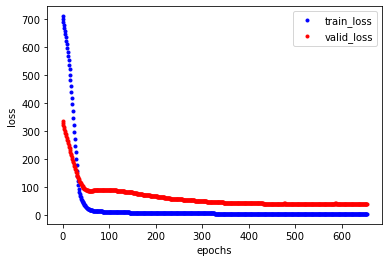

In [235]:
plt.plot(x_len,train_loss,"o",c="blue",markersize=3)
plt.plot(x_len,valid_loss,"o",c="red",markersize=3)
plt.legend(["train_loss","valid_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()